# Numerical Integration

Numerical integration can be expressed as the following approximate sum:

$$I = \int_a^b f(x) dx \approx \sum_{i=1}^{n} A_i f(x_i)$$

where $A_i$ are the weights associated with the function evaluated at $x_i$. Typically, $n+1$ data points $x_i, i = 0,1,2, \ldots , n$ are selected starting from $a$ upto $b$, and the function is evaluated at each of these ordinates. The weighted sum above is an approximation to the integral we are attemptying to evaluate.

There are two main approaches to carrying out numerical integration. The first approach based on Newton-Cotes formulae divides the interval $a$ to $b$ into a certain number of panels, usually of equal width. If $n$ is the number of panels, then $n+1$ is the number of ordinates, and the function is evaluated at each of these ordinates. For such methods, accuracy usually increases with the number of panels. The second approach is based on Gauss Quadrature. These methods evaluate the function at only a few specified ordinates. Gauss quadrature usually gives accurate results even with only a few function evaluations and can be used even when the limits tend to infinity.

## Newton-Cotes Formulas
Newton-Cotes formulas are based on approximating the given function by a polynomial and computing the integral of the polynomial.

$$I = \int_a^b f(x) dx \approx \int_a^b f_n(x) dx$$

where $f_n(x)$ is a polynomial of the form $f_n(x) = a_0 + a_1 c + a_2 x^2 + \cdots + a_{n-1} x^{n-1} + a_n x^n$.

Trapezoidal Rule is Newton-Cotes formula with $n=1$, which is the equation of a straigt line. Simpson's 1/3 Rule is Newton-Cotes formula with $n=2$, which is a parabola. Trapezoidal rule requires us to determine two unknowns, $a_0$ and $a_1$, thereby requiring two points whereas Simpson's 1/3 rule requires three unknowns $a_0$, $a_1$ and $a_2$, thereby requiring three points. It is easier to obtain the coefficients $a_i$ if the panels are of equal width. The formula for Trapezoidal rule is as follows:

$$I \approx \frac{h}{2} \left[ f(a) + f(a+h) \right]$$

Simpson's 1/3 rule is as follows:

$$I \approx \frac{h}{3} \left[ f(a) + 4 f(a+h) + f(a+2h) \right]$$

## Example
Let us consider the function $f(x) = e^{-x^2}$ and integrate it between the limits $a=0$ to $b=1$, $I = \int_{0}^{1} e^{-x^2} dx$. Let us first use SymPy to calculate the exact answer. In SymPy we must define the symbols that we will use for variables, in this case $x$. We will then define the equation that we wish to integrate, the symbol for the variable and the lower and upper limits of integration. Method **`doit()`** evaluates the integral and the function **`N()`** calculates the numerical value of the integral.

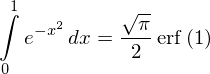

In [46]:
from __future__ import division, print_function

from sympy import *
x = symbols('x')
init_printing()

c = Integral(exp(-x**2), (x, 0, 1))
Eq(c, c.doit())

In [47]:
d = N(c.doit())
print(d)

0.746824132812427


We now have the value of the integral stored in the object $d$, which we can use later.

The two methods of numerical integration that we will use are the Trapezoidal Rule and Simpson's 1/3 Rule. Both methods require that the interval $a \text{ to } b$ be divided into equal panels, but the latter method also requires that the number of panels be an even number.

## Composite Trapezoidal Rule
Let the range $a$ to $b$ be divided into $n$ equal panels, each of width $h = \frac{b - a}{n}$. Thus the number of data points is $n+1$ and the ordinate of the points is $x_i = a + (i \cdot h), i = 0, 1, \ldots , n$.

Trapezoidal rule assumes the function to vary linearly between successive data points, and the resulting approximation to the integral is given as:

$$I = \int_a^b f(x) dx \approx \frac{h}{2} \left( y_0 + 2 \sum_{i=1}^{n-2} y_i + y_{n-1} \right)$$

where $y_i = f(x_i)$ is the value of the function evaluated at each ordindate.

In [48]:
import numpy as np

def f(x):
    return np.exp(-x**2)

def trap(f, a, b, n, verbose=False):
    x = np.linspace(a, b, n+1)
    y = f(x)
    if verbose:
        for xx, yy in zip(x, y):
            print("%10.4f %20.16f" % (xx, yy))
    h = float(b - a) / n
    s = h * (y[0] + y[-1] + 2 * sum(y[1:-1])) / 2.0
    return s

a = 0.0
b = 1.0
for n in [10, 50, 100]:
    s = trap(f, a, b, n)
    print("%5d %20.16f %8.4f" % (n, s, (s - d) * 100 / d))

   10   0.7462107961317495  -0.0821
   50   0.7467996071893513  -0.0033
  100   0.7468180014679697  -0.0008


## Composite Simpson's 1/3 Rule
If the interval from $a$ to $b$ is divided into $n$ equal panels each of width $h = \frac{b - a}{n}$ and $n+1$ is the number of ordinates, for Simpson's 1/3 rule, $n$ must be an even number (and $n+1$, obviously must be an odd number).

Simpson's 1/3 rule fits a parabola (polynomial of order two) between three successive points and approximates the integral for the two consecutive panels. To be able to do so, the number of data points must be atleast 3 and the number of panels must be an even number. The composite Simpson's 1/3 rule for $n$ data points (where $n$ must be odd), and $n-1$ panels (where $n-1$ must be even) is given below:

$$I = \int_a^b f(x) dx \approx \frac{h}{3} \left( y_0 + 4 \sum_{i=1, 3, 5,\ldots}^{n-2} y_i + 2 \sum_{j=2,4,6,\ldots}^{n-3} y_j \right)$$

In [49]:
def simp(f, a, b, npanels, verbose=False):
    x = np.linspace(a, b, npanels+1)
    y = f(x)
    if verbose:
        for xx, yy in zip(x, y):
            print("%10.4f %20.16f" % (xx, yy))
    h = float(b - a) / n
    s = h * (y[0] + y[-1] + 4*sum(y[1:-1:2]) + 2*sum(y[2:-2:2])) / 3.0
    return s

f = lambda x: np.exp(-x*x)
a = 0.0
b = 1.0
for n in [10, 50, 100]:
    s = simp(f, a, b, n)
    print("%5d %20.16f %14.10f" % (n, s, (s - d)*100/d))

   10   0.7468249482544435   0.0001091880
   50   0.7468241341203178   0.0000001751
  100   0.7468241328941762   0.0000000109


Usually we are given the function, the lower and upper limits of the interval and the number of equal panels and we have to generate both the ordinates $x_i$ as well as the value of the function $y_i$ at these ordinates. However, sometimes the data points and value of the function at these ordinates are either already evaluated, or are obtained from an experimental observation, In such case, we must merely calculate the numerical integral. In the latter case, the panel width is calculated as $x_1 - x_0$ or the difference between any two consecutive data points. The functions for Trapezoidal and Simpson's 1/3 rules to calculate numerical integration from digitized data are given below:

In [50]:
def trap1(x, y):
    assert (len(x) == len(y)), 'x and y must have same length'
    m = len(x)
    h = x[1] - x[0]
    return h * (y[0] + 2*sum(y[1:-1]) + y[-1]) / 2.0

for n in [10, 50, 100]:
    x = np.linspace(0, 1, n+1)
    y = f(x)
    s = trap1(x, y)
    print("%5d %20.16f %20.16f" % (n, s, (s-d)/s*100))

   10   0.7462107961317495  -0.0821934879335684
   50   0.7467996071893513  -0.0032840969437502
  100   0.7468180014679697  -0.0008209958042266


In [51]:
def simp1(x, y):
    assert (len(x) == len(y)), 'x and y must have same length'
    m = len(x)
    h = x[1] - x[0]
    return h / 3 * (y[0] + 4*sum(y[1:-1:2])+2*sum(y[2:-2:2])+y[-1])

a = 0.0; b = 1.0; n = 10
for n in [10, 50, 100]:
    x = np.linspace(a, b, n+1)
    y = f(x)
    s = simp1(x, y)
    print("%5d %20.16f %20.16f" % (n, s, (s-d)/s*100))

   10   0.7468249482544436   0.0001091878382589
   50   0.7468241341203179   0.0000001751270275
  100   0.7468241328941762   0.0000000109462401


Accuracy of the integral computed by the Trapezoidal Rule and Simpson's 1/3 Rule depend greatly on the number of panels into which the interval is divided. However, it is inefficient to divide the interval into a large number of panels and carry out the integration. If it is possible to determine an optimum number of panels that will give us a desired accuracy, it would be a good idea. However, the optimal number of divisions depends greatly on the nature of variation of the function being integrated. Trapezoidal rule offers a simple approach to implement it recursively and we can stop when we don't see a noticable change in the integral on subsequent iterations. This is called the recursive Trapezoidal Rule. The number of divisions is doubled each time and a recursive equation is obtained giving the change to be made to the previously calculated integrand. When this change is smaller than the required accuracy, we can stop the recursion.

\begin{align*}I_1 &= \frac{b - a}{2} \left[ f(x_a) + f(x_b) \right] \\
I_k &= \frac{1}{2} I_{k-1} + \frac{H}{2^{k-1}} \sum_{i=1}^{2^{k-2}} f\left( a + \frac{(2i-1)H}{2^{k-1}} \right),\quad k=2,3, \ldots \\
\text{where } H &= b - a
\end{align*}

In [27]:
def trap3(f, a, b, tol=1e-12, maxiter=50):
    h = float(b - a)
    s1 = h / 2.0 * (f(a) + f(b))
    k = 1
    while (k < maxiter):
        n = 2**(k-2) + 1
        s = 0.0
        for i in range(1, int(n)):
            x = a + (2*i-1)*h/2**(k-1)
            s += f(x)
        s *= h / 2**(k-1)
        s2 = s1 / 2.0 + s
        print("%5d %21.16f %21.16f %21.16f" % (k, s1, s2, (s2-s1)/s2))
        if abs(s2 - s1)/s2 < tol:
            return k, s2
        else:
            s1 = s2
            k += 1
    return k, None

i, s = trap3(f, 0.0, 1.0, 1e-6)
print(i, s)

    1    0.6839397205857212    0.3419698602928606   -1.0000000000000000
    2    0.3419698602928606    0.5603853216821327    0.3897594261278027
    3    0.5603853216821327    0.6574916327271660    0.1476920864258796
    4    0.6574916327271660    0.7031193823090877    0.0648933178773671
    5    0.7031193823090877    0.7252114805199178    0.0304629736349346
    6    0.7252114805199178    0.7360776965181424    0.0147623220342430
    7    0.7360776965181424    0.7414658845707519    0.0072669399425287
    8    0.7414658845707519    0.7441487510080799    0.0036052824568926
    9    0.7441487510080799    0.7454873774793834    0.0017956393518421
   10    0.7454873774793834    0.7461559890375631    0.0008960747725714
   11    0.7461559890375631    0.7464901193978701    0.0004476018524888
   12    0.7464901193978701    0.7466571407233649    0.0002236921290713
   13    0.7466571407233649    0.7467406404224493    0.0001118188760118
   14    0.7467406404224493    0.7467823875310751    0.000055902

In [28]:
def trap4(f, a, b, Iold, k):
    '''Recursive Trapezoidal Rule'''
    n = int(2**(k-2))
    h = float(b - a) / n
    x = a + h / 2.0
    s = 0.0
    for i in range(n):
        s += f(x)
        x += h
    Inew = (Iold + h*s) / 2.0
    return Inew

Iold = float(b - a) * (f(a) + f(b)) / 2.0
for k in range(2, 11):
    Inew = trap4(f, 0.0, 1.0, Iold, k)
    print("%5d %21.16f" % (k, Inew))
    Iold = Inew

    2    0.7313702518285630
    3    0.7429840978003812
    4    0.7458656148456952
    5    0.7465845967882216
    6    0.7467642546522943
    7    0.7468091636378279
    8    0.7468203905416179
    9    0.7468231972461524
   10    0.7468238989209475


The points to be considered when writing functions that operate on digitized data are:

1. The ordinates and function values must either be available as observed data or generated in advance
2. Data digitization must be at equal intervals

## Gauss Quadrature

\begin{align*}
I &=\int_{a}^{b} w(x) \, f(x) \, dx \approx \sum_{i=1}^{n} (A_i y_i) \\
A_i &= \text{weights, calculated based on number of points} \\
x_i &= \text{ordinates at which function is evaluated} \\
y_i &= f(x_i)
\end{align*}

### Gauss-Legendre Quadrature
\begin{align*}
I &=\int_{-1}^{1} w(x) \, f(x) \, dx \approx \sum_{i=1}^{n} (A_i y_i)
\end{align*}

Methods based on Newton-Cotes formulas depend on the number of points at which the function is evaluated to increas ccuracy of the integral. Typically, larger the number of function evaluations, more accurate is the integral. On the other hand, Gauss quadrature requires only a few function evaluations but yield fairly accurate integrals. The points at which the function is evaluated is critical in Gauss quadrature.


For Gauss-Legendre quadrature, the values of $x_i$ and $A_i$ for the limits $-1$ to $+1$ are as follows:
<table>
<tr>
<td>**Number of Points**</td><td>**Points** $x_i$</td><td>**Weights** $A_i$</td>
</tr>
<tr>
<td>1</td><td>0</td><td>2.000000</td>
</tr>
<tr>
<td>2</td><td>$-\sqrt{\frac{1}{3}}=-0.577350$</td><td>1.000000</td>
</tr>
<tr>
<td></td><td>$+\sqrt{\frac{1}{3}}=+0.577350$</td><td>1.000000</td>
</tr>
<tr>
<td>3</td><td>$-\sqrt{\frac{3}{5}}=-0.774597$</td><td>$\frac{5}{9}=0.555556$</td>
</tr>
<tr>
<td></td><td>$0$</td><td>$\frac{8}{9}=0.888889$</td>
</tr>
<tr>
<td></td><td>$+\sqrt{\frac{3}{5}}=+0.774597$</td><td>$\frac{5}{9}=0.555555$</td>
</tr>
</table>

If the limits of integration are $a$ to $b$ instead of $-1$ to $1$, we can transform the formulation assuming $x = c_1 t + c_2$, with $x=a$ at $t=-1$ and $x=b$ at $t=+1$, resulting in $c_1 = \frac{b-a}{2}$ and $c_2 = \frac{b+a}{2}$. This leads to

\begin{align*}
x &= \frac{b-a}{2} \, t + \frac{b+a}{2} \\
dx &= \frac{b-a}{2} \, dt
\end{align*}

Let us consider the numerical integration of the following function
\begin{align*}
f(x) = e^{-5t} \, \sin(\frac {4 \pi }{t})
\end{align*}

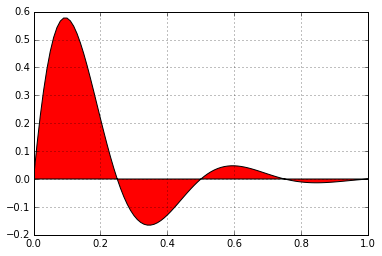

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

t = np.arange(0.0, 1.01, 0.01)
s = np.sin(2*2*np.pi*t)

plt.fill(t, s*np.exp(-5*t), 'r')
plt.grid(True)
plt.show()

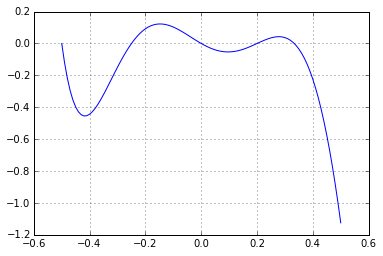

In [55]:
def f(x):
    return 120.0*(x+0.5)*(x+0.25)*x*(x-1.0/3.0)*(x-0.2)*(x-1.0)

x = np.linspace(-0.5, 0.5, 101)
y = f(x)
plt.plot(x, y)
plt.grid()
plt.show()

In [31]:
def horner(a, x):
    n = len(a)
    p = a[-1]
    for k in range(n-2, -1, -1):
        p = a[k] + p * x
    return p

a = np.array([5.0, -1.0, 3.0], dtype=float)
x = np.array([-2, -1, 0, 1, 2], dtype=float)
print(a)
print(horner(a, 1.0))
print(horner(a, 2.0))
print(horner(a, x))

[ 5. -1.  3.]
7.0
15.0
[ 19.   9.   5.   7.  15.]


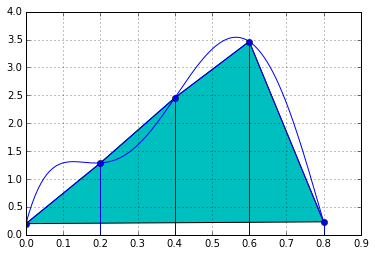

In [32]:
def f(x):
    return 0.2+25*x-200*x**2+675*x**3-900*x**4+400.0*x**5

x = np.linspace(0, 0.8, 201)
y = f(x)
plt.plot(x, y)
plt.grid()
xx = np.linspace(0, 0.8, 5)
yy = f(xx)
plt.plot(xx, yy, 'b')
plt.fill(xx, yy, 'c')
plt.stem(xx, yy, 'b')
plt.show()

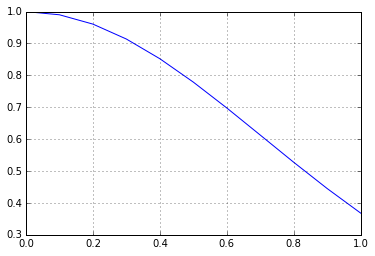

0.746210796132
0.746824948254


In [33]:
def f(x):
    return np.exp(-x**2)

x = np.linspace(0, 1, 11)
y = f(x)
plt.plot(x, y)
plt.grid()
plt.show()
print(trap1(x, y))
print(simp1(x, y))

In [34]:
def gauss_legendre(f, a, b, n=2, debug=False):
    if n == 1:
        t = np.array([0.0])
        A = np.array([2.0])
    elif n == 2:
        t1 = np.sqrt(1.0/3.0)
        t = np.array([-t1, t1])
        A = np.array([1.0, 1.0])
    elif n == 3:
        t1 = np.sqrt(3.0/5.0)
        A1 = 5.0 / 9.0
        A2 = 8.0 / 9.0
        t = np.array([-t1, 0.0, t1])
        A = np.array([A1, A2, A1])
    elif n == 4:
        t1 = np.sqrt(3.0/7 - 2.0/7*np.sqrt(6.0/5))
        t2 = np.sqrt(3.0/7 + 2.0/7*np.sqrt(6.0/5))
        A1 = (18.0 + np.sqrt(30.0)) / 36.0
        A2 = (18.0 - np.sqrt(30.0)) / 36.0
        t = np.array([-t2, -t1, t1, t2])
        A = np.array([A2, A1, A1, A2])
    else:
        t1 = (np.sqrt(5.0 - 2.0 * np.sqrt(10.0/7))) / 3.0
        t2 = (np.sqrt(5.0 + 2.0 * np.sqrt(10.0/7))) / 3.0
        A1 = (322.0 + 13 * np.sqrt(70.0)) / 900.0
        A2 = (322.0 - 13 * np.sqrt(70.0)) / 900.0
        A3 = 128.0 / 225.0
        t = np.array([-t2, -t1, 0.0, t1, t2])
        A = np.array([A2, A1, A3, A1, A2])

    c1 = (b - a) / 2.0
    c2 = (b + a) / 2.0
    x = c1 * t + c2
    y = f(x)

    if debug:
        for tt, xx, yy, AA in zip(t, x, y, A):
            print("%12.6f %12.6f %12.6f %12.6f %12.6f" % (tt, xx, yy, AA, AA*yy))

    return c1 * sum(y*A)

from scipy.special import erf

print('Correct answer =', np.sqrt(np.pi) * erf(1.0) / 2.0)

for n in [1, 2, 3, 4, 5]:
    I = gauss_legendre(f, 0, 1, n)
    print('n =', n, 'I =', I)

Correct answer = 0.746824132812
n = 1 I = 0.778800783071
n = 2 I = 0.746594688283
n = 3 I = 0.746814584191
n = 4 I = 0.746824468131
n = 5 I = 0.746824126766


In [35]:
def f(x):
    return (np.sin(x) / x)**2

print('Exact I =', 1.41815)
for n in [2, 3, 4, 5]:
    print('n =', n, 'I =', gauss_legendre(f, 0, np.pi, n))

Exact I = 1.41815
n = 2 I = 1.45031180528
n = 3 I = 1.41618742467
n = 4 I = 1.4182150179
n = 5 I = 1.4181502678


In [36]:
def f(x):
    return np.log(x) / (x**2 - 2.0*x + 2.0)

for n in [2, 3, 4, 5]:
    print('n =', n, 'I =', gauss_legendre(f, 1, np.pi, n))

n = 2 I = 0.606725022862
n = 3 I = 0.581686953277
n = 4 I = 0.584768036213
n = 5 I = 0.58500930387


In [37]:
def f(x):
    return np.sin(x) * np.log(x)

for n in [2, 3, 4, 5]:
    print('n =', n, 'I =', gauss_legendre(f, 0, np.pi, n))

n = 2 I = 0.481728993916
n = 3 I = 0.626557170805
n = 4 I = 0.634859692783
n = 5 I = 0.638388665011
